# Gesture Detection Model

## 1 Engineer features

### 1.1 Import libraries and transformers  

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from keras.utils import to_categorical
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
import os
os.getcwd()

'C:\\Users\\Christian\\git\\drone_steering\\models'

In [3]:
os.chdir('..')

In [4]:
from app.module import DataEnsembler, LabelGenerator, GestureTransformer, DataResampler

### 1.2  Load data

In [5]:
tolerance_range = 2
sazero = 2000

In [6]:
de = DataEnsembler(ms_per_frame=120)
de.investigate_available_datafiles(data_dir='data/gesture/', is_frame_based = True)
de.combined_data_files_df

,filename_features,filename_labels
0,features_flip_c_01_120.csv,labels_flip_c_01.csv
1,features_flip_c_02_120.csv,labels_flip_c_02.csv
2,features_flip_c_03_120.csv,labels_flip_c_03.csv
3,features_flip_l_01_120.csv,labels_flip_l_01.csv
4,features_flip_l_02_120.csv,labels_flip_l_02.csv
5,features_flip_l_03_120.csv,labels_flip_l_03.csv
6,features_flip_p_01_120.csv,labels_flip_p_01.csv
7,features_land_c_01_120.csv,labels_land_c_01.csv
8,features_land_c_02_120.csv,labels_land_c_02.csv
9,features_land_c_03_120.csv,labels_land_c_03.csv


In [7]:
de.load_data()
de.assemble_data(tolerance_range=tolerance_range)

In [8]:
de.display_information()

i: 0 	shape X: (603, 18, 16) 	shape y: (603,) 	count: 101
i: 1 	shape X: (519, 18, 16) 	shape y: (519,) 	count: 89
i: 2 	shape X: (498, 18, 16) 	shape y: (498,) 	count: 119
i: 3 	shape X: (650, 18, 16) 	shape y: (650,) 	count: 230
i: 4 	shape X: (508, 18, 16) 	shape y: (508,) 	count: 147
i: 5 	shape X: (466, 18, 16) 	shape y: (466,) 	count: 146
i: 6 	shape X: (601, 18, 16) 	shape y: (601,) 	count: 159
i: 7 	shape X: (440, 18, 16) 	shape y: (440,) 	count: 127
i: 8 	shape X: (490, 18, 16) 	shape y: (490,) 	count: 110
i: 9 	shape X: (476, 18, 16) 	shape y: (476,) 	count: 118
i: 10 	shape X: (492, 18, 16) 	shape y: (492,) 	count: 121
i: 11 	shape X: (436, 18, 16) 	shape y: (436,) 	count: 87
i: 12 	shape X: (466, 18, 16) 	shape y: (466,) 	count: 126
i: 13 	shape X: (551, 18, 16) 	shape y: (551,) 	count: 127
i: 14 	shape X: (550, 18, 16) 	shape y: (550,) 	count: 114
i: 15 	shape X: (549, 18, 16) 	shape y: (549,) 	count: 115
i: 16 	shape X: (402, 18, 16) 	shape y: (402,) 	count: 160
i: 17 	sh

In [9]:
dr = DataResampler()

In [10]:
dr.fit(de.X, de.y)
dr.restrict_zero_labels(sazero, criterion='variance_lowest')
dr.display_information()

-------------------------------------
Current number of zero-labels: 15777
New number of zero-labels (selected with criterion="variance_lowest"): 2000


,abs_orig,pct_orig,abs_current,pct_current
0,15777,75.92,2000,28.55
1,701,3.37,701,10.01
2,763,3.67,763,10.89
3,991,4.77,991,14.15
4,1042,5.01,1042,14.88
5,819,3.94,819,11.69
6,689,3.32,689,9.84


In [11]:
gt = GestureTransformer(feature_names = list(de.LabelGenerators[0].feature_names),byrow=True)
X = gt.transform(dr.X)
y = to_categorical(dr.y)

## 2 Train model

### 2.1  Split in train / test

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03, random_state=1)

### 2.2 Define and compile model

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM

In [14]:
n_timesteps = X.shape[1] # here 18
n_features = X.shape[2] # here 16
n_outputs =  y.shape[1] # here 7 (number of labels)

model = Sequential()
model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               46800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 455       
Total params: 63,819
Trainable params: 63,819
Non-trainable params: 0
_________________________________________________________________


### 2.3 Fit and validate model

In [15]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)

Epoch 1/30
6794/6794 [==============================] - 6s 871us/step - loss: 0.6363 - acc: 0.7713
Epoch 2/30
6794/6794 [==============================] - 5s 693us/step - loss: 0.2807 - acc: 0.9045
Epoch 3/30
6794/6794 [==============================] - 5s 734us/step - loss: 0.2412 - acc: 0.9202 0s - loss: 0.2433 - acc: 0.9
Epoch 4/30
6794/6794 [==============================] - 6s 893us/step - loss: 0.2181 - acc: 0.9260TA: 1s - loss: 0.2183 - acc: 0 - ETA: 
Epoch 5/30
6794/6794 [==============================] - 5s 801us/step - loss: 0.1983 - acc: 0.9298 1s - lo
Epoch 6/30
6794/6794 [==============================] - 5s 707us/step - loss: 0.1894 - acc: 0.9364
Epoch 7/30
6794/6794 [==============================] - 6s 850us/step - loss: 0.1778 - acc: 0.9382
Epoch 8/30
6794/6794 [==============================] - 9s 1ms/step - loss: 0.1727 - acc: 0.9401
Epoch 9/30
6794/6794 [==============================] - 8s 1ms/step - loss: 0.1707 - acc: 0.9423
Epoch 10/30
6794/6794 [===============

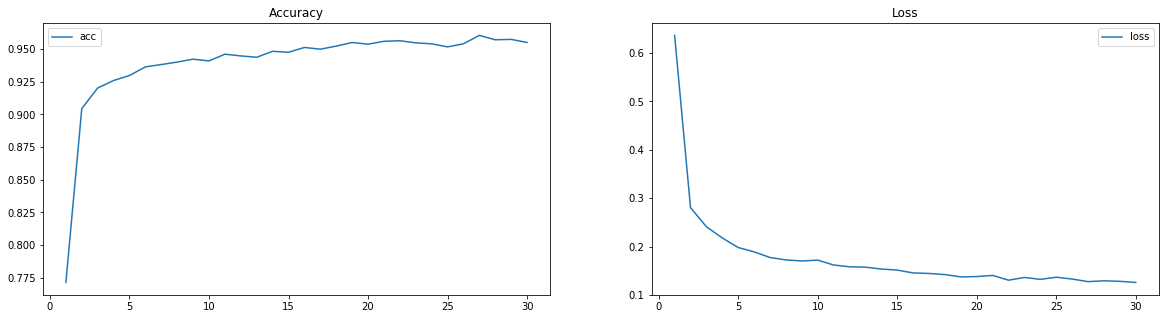

In [16]:
r = range(1, len(history.history["acc"]) + 1)

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(r, history.history["acc"], label="acc")
# plt.plot(r, history.history["val_acc"], label="val_acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(r, history.history["loss"], label="loss")
# plt.plot(r, history.history["val_loss"], label="val_loss")
plt.legend()
plt.title("Loss")

plt.show()
plt.close()

In [17]:
eval_results = np.round(model.evaluate(X_test, y_test, batch_size=16, verbose=1),2)
print("Loss:     " + str(eval_results[0]))
print("Accuracy: " + str(eval_results[1]))

211/211 [==============================] - 0s 2ms/step
Loss:     0.2
Accuracy: 0.93


In [18]:
for i in range(X_test.shape[0]):
    if (model.predict_classes(X_test[i:(i+1),:,:])[0]!=np.nonzero(y_test[i])[0][0]):
        print("Index:",i,\
              "\tPred:",model.predict_classes(X_test[i:(i+1),:,:])[0],\
              "\tActual:",np.nonzero(y_test[i])[0][0],\
              "\tProbability:",round(np.max(model.predict_proba(X_test[i:(i+1),:,:])),2))

Index: 3 	Pred: 2 	Actual: 0 	Probability: 0.54
Index: 54 	Pred: 4 	Actual: 0 	Probability: 0.53
Index: 62 	Pred: 0 	Actual: 5 	Probability: 0.68
Index: 67 	Pred: 0 	Actual: 2 	Probability: 0.61
Index: 73 	Pred: 1 	Actual: 0 	Probability: 0.99
Index: 82 	Pred: 0 	Actual: 6 	Probability: 0.98
Index: 88 	Pred: 2 	Actual: 0 	Probability: 0.69
Index: 106 	Pred: 0 	Actual: 1 	Probability: 0.72
Index: 107 	Pred: 2 	Actual: 0 	Probability: 0.99
Index: 115 	Pred: 0 	Actual: 6 	Probability: 0.96
Index: 146 	Pred: 2 	Actual: 0 	Probability: 0.6
Index: 155 	Pred: 4 	Actual: 0 	Probability: 0.98
Index: 188 	Pred: 4 	Actual: 0 	Probability: 0.57
Index: 191 	Pred: 5 	Actual: 0 	Probability: 0.9
Index: 205 	Pred: 5 	Actual: 0 	Probability: 0.59


In [19]:
for i in range(X_test.shape[0]):
    if (model.predict_classes(X_test[i:(i+1),:,:])[0]==np.nonzero(y_test[i])[0][0]):
        print("Index:",i,\
              "\tPred:",model.predict_classes(X_test[i:(i+1),:,:])[0],\
              "\tActual:",np.nonzero(y_test[i])[0][0],\
              "\tProbability:",round(np.max(model.predict_proba(X_test[i:(i+1),:,:])),2))

Index: 0 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 1 	Pred: 2 	Actual: 2 	Probability: 0.99
Index: 2 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4 	Pred: 5 	Actual: 5 	Probability: 0.99
Index: 5 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 6 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 7 	Pred: 0 	Actual: 0 	Probability: 0.67
Index: 8 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 9 	Pred: 5 	Actual: 5 	Probability: 0.99
Index: 10 	Pred: 4 	Actual: 4 	Probability: 0.95
Index: 11 	Pred: 2 	Actual: 2 	Probability: 0.59
Index: 12 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 13 	Pred: 3 	Actual: 3 	Probability: 0.61
Index: 14 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 15 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 16 	Pred: 5 	Actual: 5 	Probability: 0.99
Index: 17 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 18 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 19 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 20 	Pred: 0 	Actual: 0 	Probability: 0.54
Index: 21 	Pred: 4 	Actual: 4 	Probabili

Index: 181 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 182 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 183 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 184 	Pred: 0 	Actual: 0 	Probability: 0.65
Index: 185 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 186 	Pred: 1 	Actual: 1 	Probability: 0.99
Index: 187 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 189 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 190 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 192 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 193 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 194 	Pred: 4 	Actual: 4 	Probability: 0.99
Index: 195 	Pred: 0 	Actual: 0 	Probability: 0.96
Index: 196 	Pred: 1 	Actual: 1 	Probability: 0.99
Index: 197 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 198 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 199 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 200 	Pred: 5 	Actual: 5 	Probability: 0.98
Index: 201 	Pred: 0 	Actual: 0 	Probability: 0.57
Index: 202 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 203

### 2.4 Save model

In [20]:
from keras.models import load_model
import h5py
model.save('models/model_gesture.h5')